# Карташов ДД, ИМ17-06Б
# Компьютерная геометрия №3
# Метод полос

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
plt.rcParams["figure.figsize"] = (7,9)

In [5]:
def binSearch(C,A,less = lambda a,b: a<b):
    '''
    С - сортированный список элементов, между которыми будет происходить поиск элемента А
    Less - предикат
    '''
    a = 0
    b = len(C)-1
    c = (a+b)//2
    if not less(C[a],A) or less(C[b],A): 
        return None
    while abs(b-a) >1:
        if less(C[c],A): a = c
        else: b = c
        c = (a+b)//2
    return c

In [45]:
def show(E,weight = [],P = [],face = [], M =[],G = [],g ='',lines = False):
    # рисует граф и с ним связанное
    res = []
    for e in E:
        res.append([e[0][0],e[1][0]])
        res.append([e[0][1],e[1][1]])
    
    fig, ax = plt.subplots()
    
    
    for i in range(1,len(res),2):
        if len(weight) == 0: st = ''
        else:
            st = str(weight[i//2])
        x1,x2 = res[i-1][0],res[i-1][1]
        y1,y2 = res[i][0],res[i][1]
        ax.plot(res[i-1], res[i],'hb-')
        ax.text((x1+x2)/2, (y1+y2)/2, st,fontsize = 20)
    if len(face) != 0:
        y = []
        x = []
        for e in face:
            
            x.append(e[0][0])
            y.append(e[0][1])
        ax.fill(x,y,facecolor='lightsalmon', edgecolor='orangered', linewidth=3)
    if len(P) != 0:
        ax.plot(P[0],P[1],'^g',markersize = 15)
    if len(M) !=0:
        if lines:
            xmax = max([m[0] for m in M]) + 1
            xmin = min([m[0] for m in M]) - 1
            for m in M:
                ax.plot([xmin,xmax],[m[1],m[1]], 'r--')
        
        for m in M:
            ax.text(m[0],m[1],str(m),fontsize = 15)
    if len(G) != 0:
        for i in range(len(G)):
            
            if g == 'Г{}'.format(i):
                ax.text(G[i][0],G[i][1],'Г{}'.format(i),fontsize = 15,color = 'r')
            else:
                ax.text(G[i][0],G[i][1],'Г{}'.format(i),fontsize = 15)
                
                    
    fig

# Решаем задачу:

In [42]:
M = [[0,0],[-2,2],[1,4],[4,6],[-4,8],[-1,12],[6,15]] #список точек
v1 = [1,1,2,2,2,3,4,5,6]# индексы начальных точек ребер
v2 = [2,3,5,6,7,4,7,6,7]# индексы конечных точек ребер
Gleft = [0,1,0,3,2,1,1,0,0]# индексы граней, находящихся слева от ребер
Gright = [1,0,3,2,1,0,0,3,2]# -\\- справа от ребер
E = [[M[v1[i]-1],M[v2[i]-1]] for i in range(len(v1))]# генерация списка ребер



G = [[4,3],[3,8],[0,10],[-2.6,7]] # список точек, на месте которых будут рисоваться обозначения граней "Г0",...,"Г3"


# заполнение РСДС
RSDS= pd.DataFrame({'ребро':E,
                   'Г(слева)':['Г'+str(v) for v in Gleft],
                   'Г(справа)':['Г'+str(v) for v in Gright]})


### Реберный список:

In [8]:
RSDS

,ребро,Г(слева),Г(справа)
0,"[[0, 0], [-2, 2]]",Г0,Г1
1,"[[0, 0], [1, 4]]",Г1,Г0
2,"[[-2, 2], [-4, 8]]",Г0,Г3
3,"[[-2, 2], [-1, 12]]",Г3,Г2
4,"[[-2, 2], [6, 15]]",Г2,Г1
5,"[[1, 4], [4, 6]]",Г1,Г0
6,"[[4, 6], [6, 15]]",Г1,Г0
7,"[[-4, 8], [-1, 12]]",Г0,Г3
8,"[[-1, 12], [6, 15]]",Г0,Г2


### Посмотрим на граф:

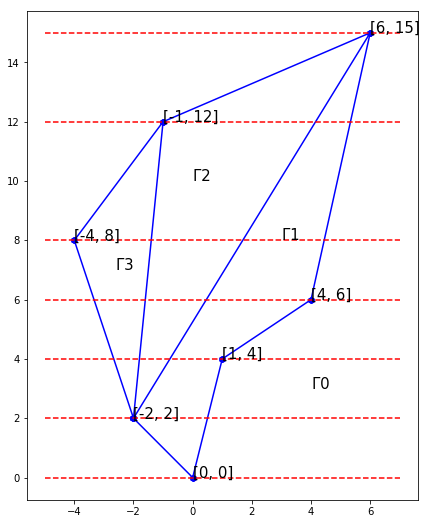

In [49]:
show(E,M=M,G=G,lines = True)

# Шаг 1: выделение списков ребер, входящих в соответствующие полосы

In [10]:
def areAvailableTo(E,A):
    '''
    показывает, какие вершины доступны из текущей вершины А
    '''
    return [e[1] for e in E if e[0] == A]

In [11]:
def getlinesEdges(M,E):
    '''
    выделение списков ребер, входящих в соответствующие полосы
    '''
    # нулевой шаг для инииализации
    d = [[] for p in M[:-1]]
    ave = areAvailableTo(E,M[0])
    d[0] += [[M[0],v] for v in ave]
    
    # далее
    for i in range(1,len(M)-1):
        # заходим на каждую полосу
        ave = areAvailableTo(E,M[i])    # смотрим, какие ребра начинаются в ней =>
        d[i] += [[M[i],v] for v in ave] # => добавляем эти ребра в список ребер полосы
        for prev in d[i-1]:
            # заходим на предыдущую полосу и смотрим на ребра, которые проходят через нее
            if prev[1][1] >= M[i+1][1]: # если какие-то ребра идут выше текущей полосы,то
                d[i].append(prev)  # добавляем их в реберный список текущей полосы
    return d

In [12]:
d = getlinesEdges(M,E) # находим реберный список для каждой полосы

In [13]:
# это он и есть:
for i in range(len(d)):
    print('П{}'.format(i),d[i])

П0 [[[0, 0], [-2, 2]], [[0, 0], [1, 4]]]
П1 [[[-2, 2], [-4, 8]], [[-2, 2], [-1, 12]], [[-2, 2], [6, 15]], [[0, 0], [1, 4]]]
П2 [[[1, 4], [4, 6]], [[-2, 2], [-4, 8]], [[-2, 2], [-1, 12]], [[-2, 2], [6, 15]]]
П3 [[[4, 6], [6, 15]], [[-2, 2], [-4, 8]], [[-2, 2], [-1, 12]], [[-2, 2], [6, 15]]]
П4 [[[-4, 8], [-1, 12]], [[4, 6], [6, 15]], [[-2, 2], [-1, 12]], [[-2, 2], [6, 15]]]
П5 [[[-1, 12], [6, 15]], [[4, 6], [6, 15]], [[-2, 2], [6, 15]]]


## Теперь нужно отсортировать ребра в каждой полосе, чтобы можно было проводить бинарный поиск:

In [14]:
def _sortEdges(es,y):
    '''
    сортирует ребра в ОДНОЙ полосе в зависимости от
    абсциссы точки пересечения нижней стороны полосы с ребром
    '''
    xs = []
    for e in es:
        if e[0][1] == y:
            xs.append(e[0][0])
        else:
            # нахождение абсциссы пересечения ребра с нижней границей полосы
            add = (y - e[0][1])*(e[1][0] - e[0][0])/(e[1][1] - e[0][1]) + e[0][0]
            xs.append(add)
    df = pd.DataFrame({'ребро': es,'абсцисса точки пересечения с началом полосы':xs})
    
    # непосредственная сортировка
    df = df.sort_values('абсцисса точки пересечения с началом полосы')
    es = list(df['ребро'])
    return es

In [15]:
def SortEdges(d,M):
    '''
    сортирует ребра для КАЖДОЙ полосы
    '''
    ys = np.unique([m[1] for m in M])
    for i in range(len(d)):
        d[i] = _sortEdges(d[i],ys[i])
    return d

In [16]:
# непосредственная сортировка ребер для каждой полосы
d = SortEdges(d,M)

In [17]:
# теперь списки ребер отсортированы
for i in range(len(d)):
    print('П{}'.format(i),d[i])

П0 [[[0, 0], [-2, 2]], [[0, 0], [1, 4]]]
П1 [[[-2, 2], [-4, 8]], [[-2, 2], [-1, 12]], [[-2, 2], [6, 15]], [[0, 0], [1, 4]]]
П2 [[[-2, 2], [-4, 8]], [[-2, 2], [-1, 12]], [[-2, 2], [6, 15]], [[1, 4], [4, 6]]]
П3 [[[-2, 2], [-4, 8]], [[-2, 2], [-1, 12]], [[-2, 2], [6, 15]], [[4, 6], [6, 15]]]
П4 [[[-4, 8], [-1, 12]], [[-2, 2], [-1, 12]], [[-2, 2], [6, 15]], [[4, 6], [6, 15]]]
П5 [[[-1, 12], [6, 15]], [[-2, 2], [6, 15]], [[4, 6], [6, 15]]]


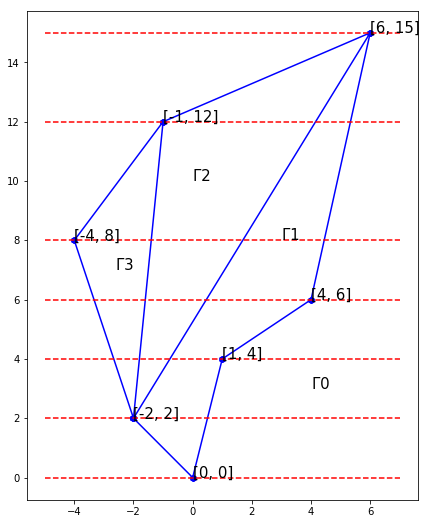

In [50]:
# убедимся в этом наглядно
show(E,M=M,G=G,lines =True)

# Поиск полосы,которая содержит исследуемую точку

In [18]:
def searchLine(M,A):
    '''
    производит бинарный поиск полосы, в которой находится искомая точка
    '''
    ys = np.unique([m[1] for m in M])
    idx = binSearch(ys,A[1])
    return idx

In [19]:
def rotate(A,B,C):
    '''
    определяет направление поворота. Это векторное произведение двух векторов
    '''
    return (B[0]-A[0])*(C[1]-B[1])-(B[1]-A[1])*(C[0]-B[0])

In [20]:
def right_to_edge(e,a):
    '''
    проверка: точка А правее ли ребра Е
    с помощью векторного произведения
    '''
    return rotate(a,e[0],e[1]) < 0

In [21]:
def searchEdge(d,M,A):
    '''
    поиск полосы(i), в которой лежит точка, и самого ближнего слева(в этой полосе) ребра(j) к точке

    '''
    i = searchLine(M,A)#поиск полосы, в которой находится точка А
    if i == None: return i,None
    j = binSearch(d[i],A,right_to_edge)#поиск ближайшего ребра, правее которого находится точка А
    return i,j

In [22]:
def SEARCH_FACE(RSDS,d,M,A):
    '''
    поиск грани, которой принадлежит точка
    '''
    i,j = searchEdge(d,M,A) # находим i-индекс полосы и j - индекс ребра в этой полосе, которым принадлежит точка
    if i == None or j == None: return 'Г0' #если точка принадлежит внешней грани, то так и говорим
    edge_left = d[i][j] # из списка ребер выбираем ребро из найденной полосы, ближе всего к которому справа расположена точка
    
    #далее находим положение найденного ребра в РСДС
    for i in range(len(RSDS)):
        if RSDS.iloc[i,0] == edge_left:
            return RSDS['Г(справа)'][i]#нашли индекс ребра в рсдс
            #и возвращаем грань, которая расположена справа от этого ребра. В ней и лежит исследуемая точка.
    

# Проведем эксперименты по поиску граней, которым принадлежат точки

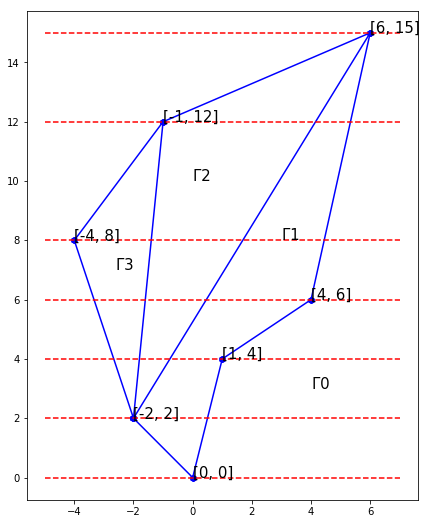

In [51]:
show(E,M=M,G = G,lines = True)

## Далее будем искать грань для точки, выводить на экран граф, исследуемую точку(треугольником), все грани и одну грань красным цветом(в которой расположена исследуемая точка)

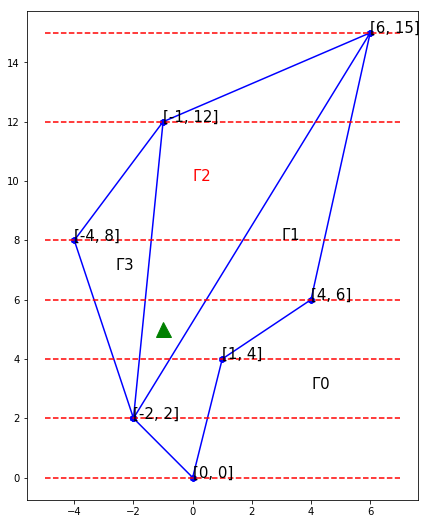

In [52]:
# ПРИМЕР 1
A = [-1,5]
g = SEARCH_FACE(RSDS,d,M,A) # поиск грани
show(E,M=M,G = G,g = g,P = A,lines = True) #ывод всего того на экран

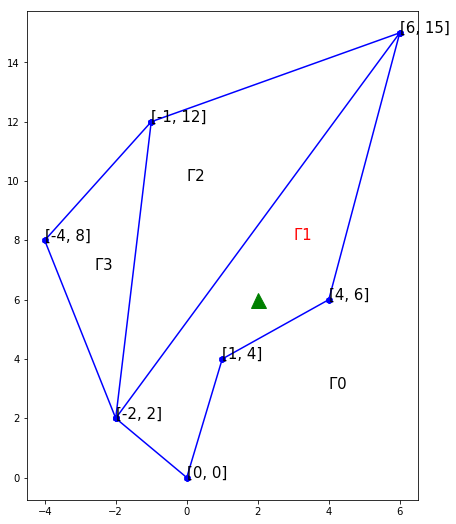

In [53]:
# ПРИМЕР 2
A = [2,6]
g = SEARCH_FACE(RSDS,d,M,A) # поиск грани
show(E,M=M,G = G,g = g,P = A) #ывод всего того на экран

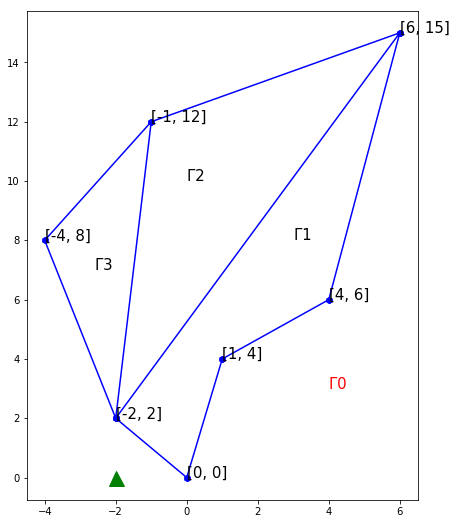

In [54]:
# ПРИМЕР 3
A = [-2,0]
g = SEARCH_FACE(RSDS,d,M,A) # поиск грани
show(E,M=M,G = G,g = g,P = A) #ывод всего того на экран

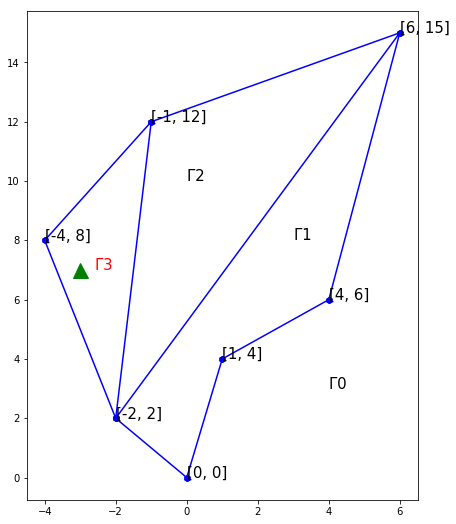

In [55]:
# ПРИМЕР 4
A = [-3,7]
g = SEARCH_FACE(RSDS,d,M,A) # поиск грани
show(E,M=M,G = G,g = g,P = A) #ывод всего того на экран